In [2]:
library(gapminder)
library(tidyverse)
library(colorRamps)
library(viridis)
library(plotly)
library(broom)
library(patchwork)
options(repr.plot.width=12, repr.plot.heigh=12)

Loading required package: viridisLite




Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [3]:
# colormap <- colorspace::diverge_hcl(12, c=100, l=c(50,90), power=1) 
colormap <- viridis::plasma(10)
palette(colormap)

continent_col <- viridis::plasma(6)[1:5]

color1 <- colormap[2]
color2 <- colormap[8]

In [4]:
ThemeMain<-theme( title =element_text(size=16, face='bold'),
                 axis.text.y = element_blank(), 
                 axis.text.x = element_text(color='black'),
                 axis.ticks.y = element_blank(),
                 axis.title.x = element_text(size=16,color='black',face='bold')
                 )

## General Statistics

In [5]:
box_cox <- function(y, tau) {
    if (any(y <= 0)) {
        stop("Box-Cox transformation requires y to be strictly positive.")
    }
    
    if (tau == 0) {
        return(log(y))  # Log transformation when tau = 0
    } else {
        return((y^tau - 1) / tau)
    }
}

In [6]:
gapminder <- gapminder %>%
    mutate(log_gdpPercap = log(gdpPercap))

    # gapminder <- gapminder %>%
    # mutate(log_gdpPercap = box_cox(gdpPercap, -.5))

In [7]:
head(gapminder)

country     continent year lifeExp pop      gdpPercap log_gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453  6.658583     
2 Afghanistan Asia      1957 30.332   9240934 820.8530  6.710344     
3 Afghanistan Asia      1962 31.997  10267083 853.1007  6.748878     
4 Afghanistan Asia      1967 34.020  11537966 836.1971  6.728864     
5 Afghanistan Asia      1972 36.088  13079460 739.9811  6.606625     
6 Afghanistan Asia      1977 38.438  14880372 786.1134  6.667101

In [8]:
print("Unique Countries")
length(unique(gapminder[["country"]]))
print("Unique Continents")
length(unique(gapminder[["continent"]]))
print("Years")
length(unique(gapminder[["year"]]))

[1] "Unique Countries"


[1] 142

[1] "Unique Continents"


[1] 5

[1] "Years"


[1] 12

In [9]:
df <- gapminder %>%
    group_by(country) %>%
    summarize(mean_life_exp = mean(lifeExp)) %>%
    arrange(desc(mean_life_exp)) %>%
    slice(1:5)
    
df <- df %>%
    left_join(gapminder %>% select(country, continent) %>% distinct(), by = "country")

df

country     mean_life_exp continent
1 Iceland     76.51142      Europe   
2 Sweden      76.17700      Europe   
3 Norway      75.84300      Europe   
4 Netherlands 75.64850      Europe   
5 Switzerland 75.56508      Europe

In [10]:
df <- gapminder %>%
    group_by(country) %>%
    summarize(
        growth = (lifeExp[year == max(year)] - lifeExp[year == min(year)]) / lifeExp[year == min(year)]  
    ) %>%
    arrange(desc(growth)) %>%
    slice(1:5)

df <- df %>%
    left_join(gapminder %>% select(country, continent) %>% distinct(), by = "country")

df

country     growth    continent
1 Oman        1.0128799 Asia     
2 Gambia      0.9816000 Africa   
3 Yemen, Rep. 0.9263242 Asia     
4 Indonesia   0.8856091 Asia     
5 Vietnam     0.8373008 Asia

### Life Expectancy

In [11]:
df <- gapminder %>%
    group_by(country) %>%
    summarize(mean_life_exp = mean(lifeExp))
    
ggplot(data = df,  aes(x = mean_life_exp)) +
        geom_histogram(bins=15, fill = color2) +
        theme_bw() + 
        ThemeMain + 
        labs(title = "Life Expectancy", x = "Density Estimate of Life Expectancy", y= "Amount of Countries")

In [12]:

ggplot(gapminder, aes(x = continent, y = lifeExp, fill = continent)) +
  geom_boxplot() +
  scale_fill_manual(values = continent_col ) +
  theme_bw() +
  ThemeMain +
  theme(
    axis.text.x = element_text(size = 15, face = "bold"),   
    axis.title.x = element_blank(), 
  ) +
  labs(title = "Life Expectancy By Continent", x="Continent", y="Life Expectancy")

### GDP

In [13]:
df <- gapminder %>%
    group_by(country) %>%
    summarize(gdp = mean(gdpPercap)) %>%
    arrange(desc(gdp)) %>%
    slice(1:5)
    
df <- df %>%
    left_join(gapminder %>% select(country, continent) %>% distinct(), by = "country")

df

country       gdp      continent
1 Kuwait        65332.91 Asia     
2 Switzerland   27074.33 Europe   
3 Norway        26747.31 Europe   
4 United States 26261.15 Americas 
5 Canada        22410.75 Americas

In [14]:
df <- gapminder %>%
    group_by(country) %>%
    summarize(mean_life_exp = mean(gdpPercap))
    
ggplot(data = df,  aes(x = mean_life_exp)) +
        geom_histogram(bins=25, fill = color2) +
        theme_bw() + 
        ThemeMain +
        labs(title = "Histogram of GDP per capita", x = "Density Estimate of GDP per capita", y= "Amount of Countries")

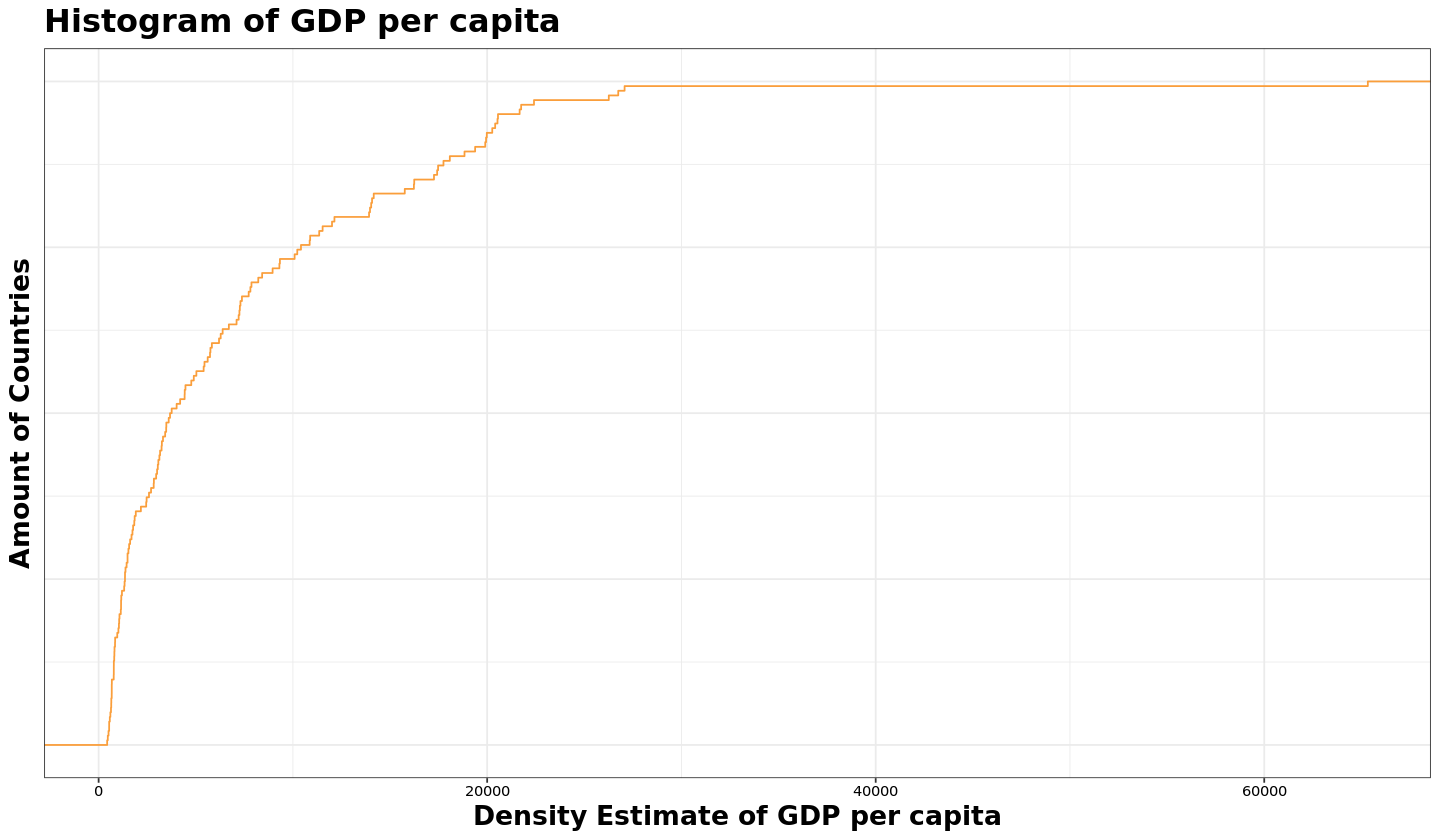

In [15]:
ggplot(data = df,  aes(x = mean_life_exp)) +
        stat_ecdf(color=color2) +
        theme_bw() + 
        ThemeMain+
        labs(title = "Histogram of GDP per capita", x = "Density Estimate of GDP per capita", y= "Amount of Countries")

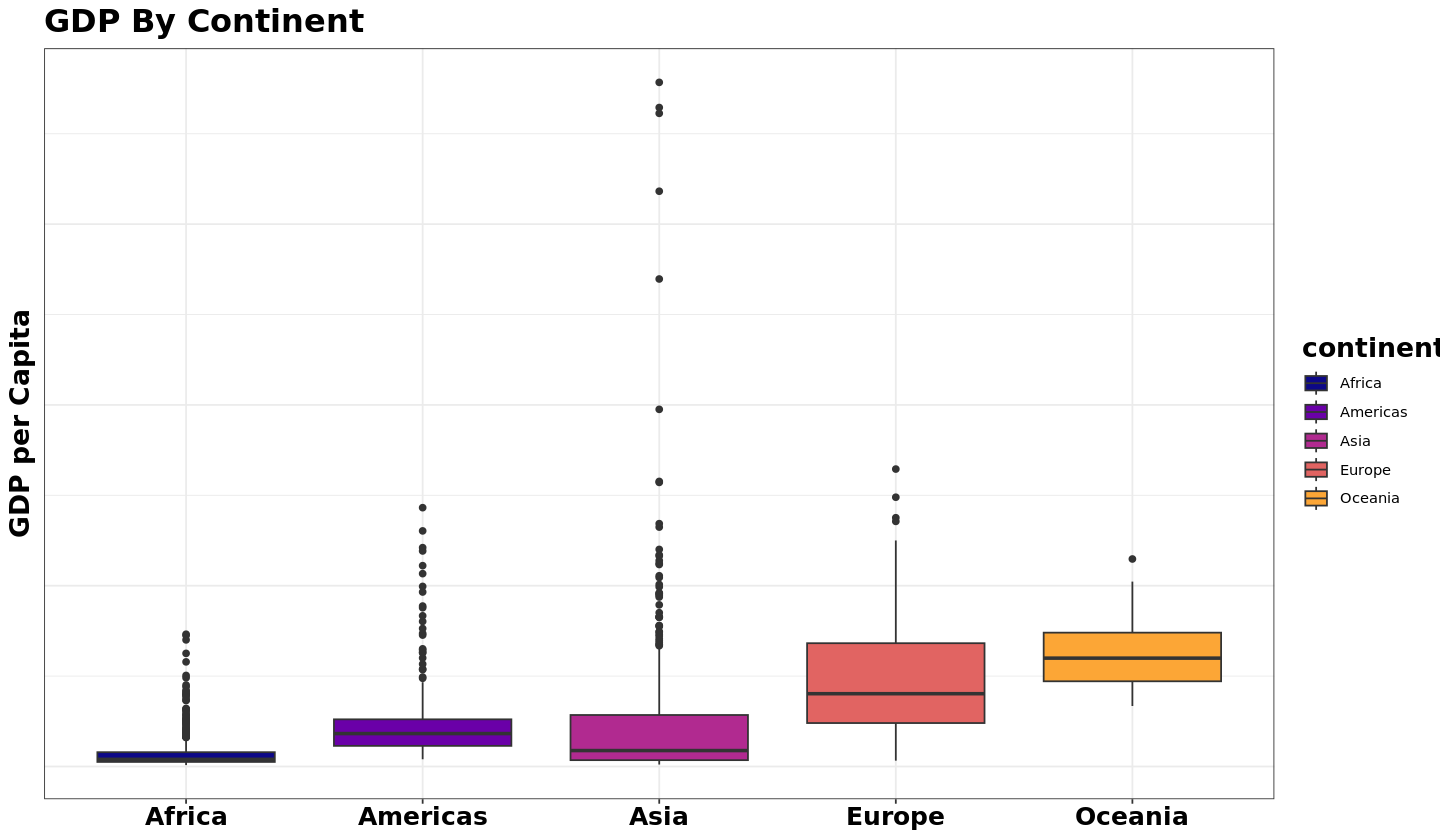

In [16]:

ggplot(gapminder, aes(x = continent, y = gdpPercap, fill = continent)) +
  geom_boxplot() +
  scale_fill_manual(values = continent_col ) +
  theme_bw() +
  ThemeMain +
  theme(
    axis.text.x = element_text(size = 15, face = "bold"),   
    axis.title.x = element_blank(), 
  ) +
  labs(title = "GDP By Continent", 
    #  x="Continent", 
    y="GDP per Capita")

## GDP Trends in Life Expectancy

In [17]:
subset_df <- subset(gapminder, subset = year==2007)
# subset_df <- subset(gapminder)

In [18]:
ggplot(data =  subset_df, aes(x = gdpPercap, y = lifeExp)) +
    geom_point(size= 2, alpha=.7, color=color1)  +
    geom_smooth(method = lm, color=color2, se=FALSE) +
    theme_bw() + 
    ThemeMain +
    labs(title = "GDP per Capita vs Life Expectancy",
       x = "GDP per Capita (log scale)",
       y = "Life Expectancy (years)")

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


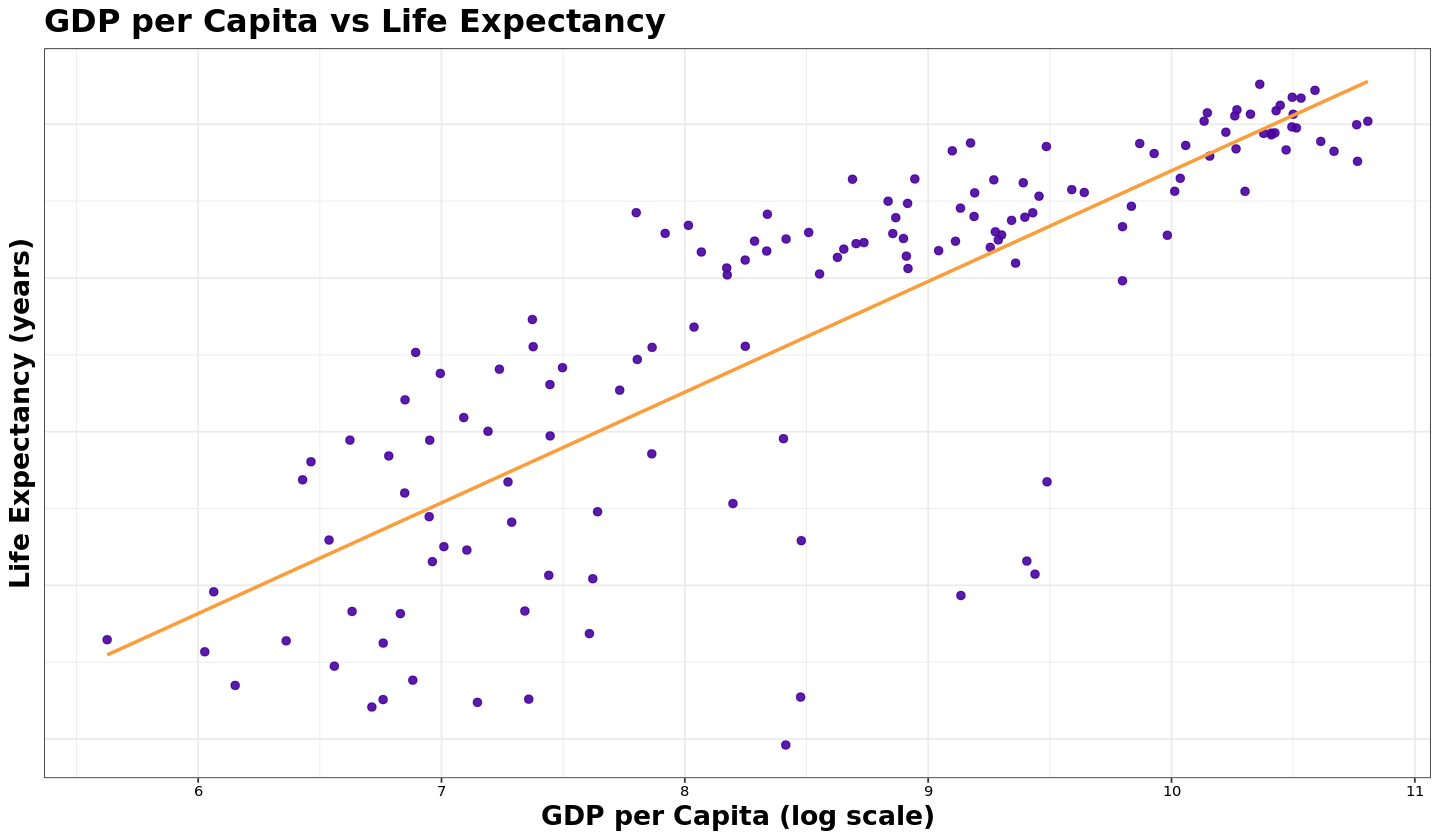

In [19]:
ggplot(data =  subset_df, aes(x = log_gdpPercap, y = lifeExp)) +
    geom_point(size = 2, alpha=.9, color=color1)  +
    geom_smooth(method = lm, color=color2, se=FALSE) +
    theme_bw() + 
    ThemeMain + 
    labs(title = "GDP per Capita vs Life Expectancy",
       x = "GDP per Capita (log scale)",
       y = "Life Expectancy (years)")

`geom_smooth()` using formula = 'y ~ x'


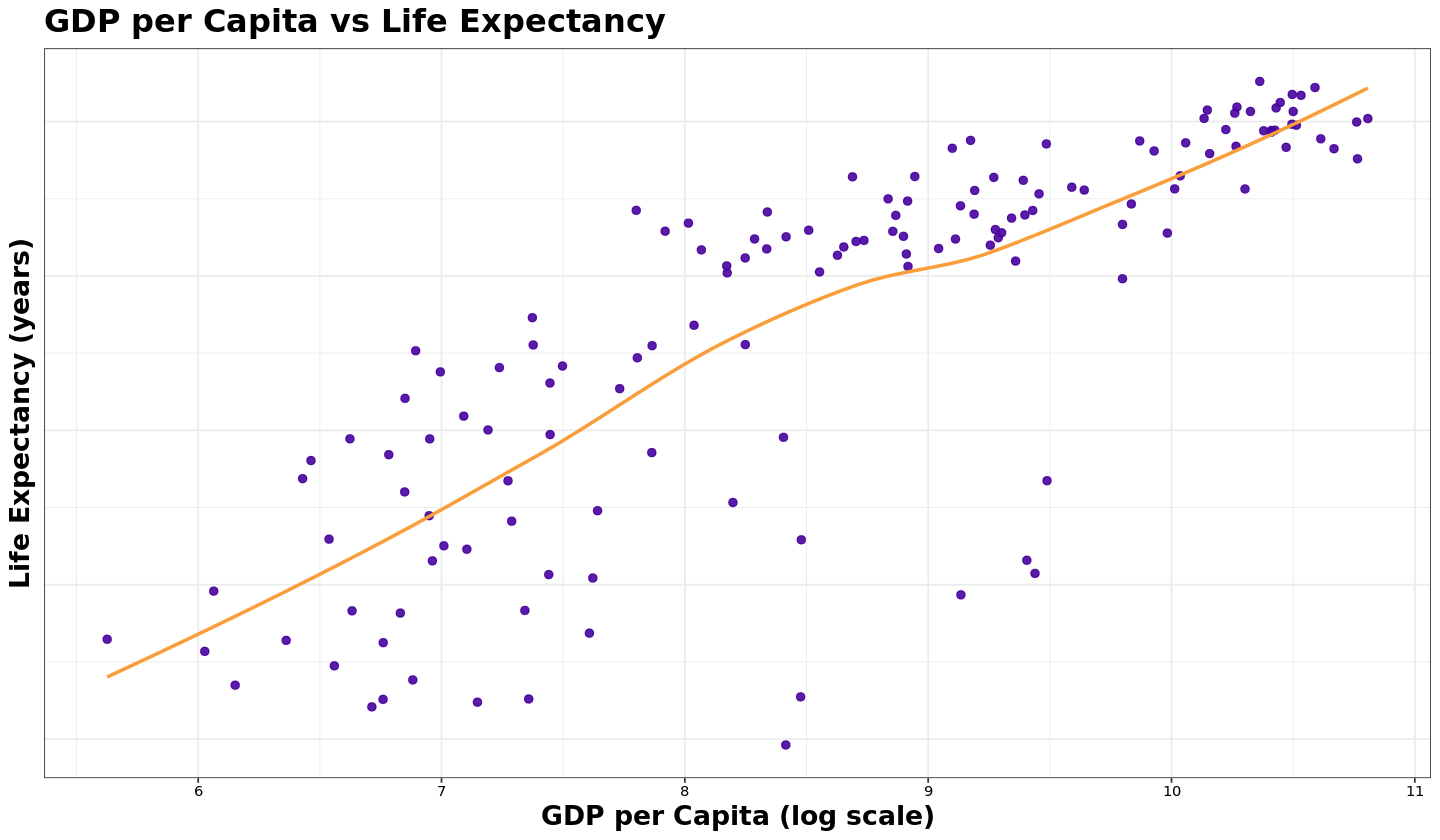

In [20]:
ggplot(data =  subset_df, aes(x = log_gdpPercap, y = lifeExp)) +
    geom_point(size= 2, alpha=.9, color=color1)  +
    geom_smooth(method = loess, color=color2, se=FALSE) +
    theme_bw() + 
    ThemeMain + 
    labs(title = "GDP per Capita vs Life Expectancy",
       x = "GDP per Capita (log scale)",
       y = "Life Expectancy (years)")

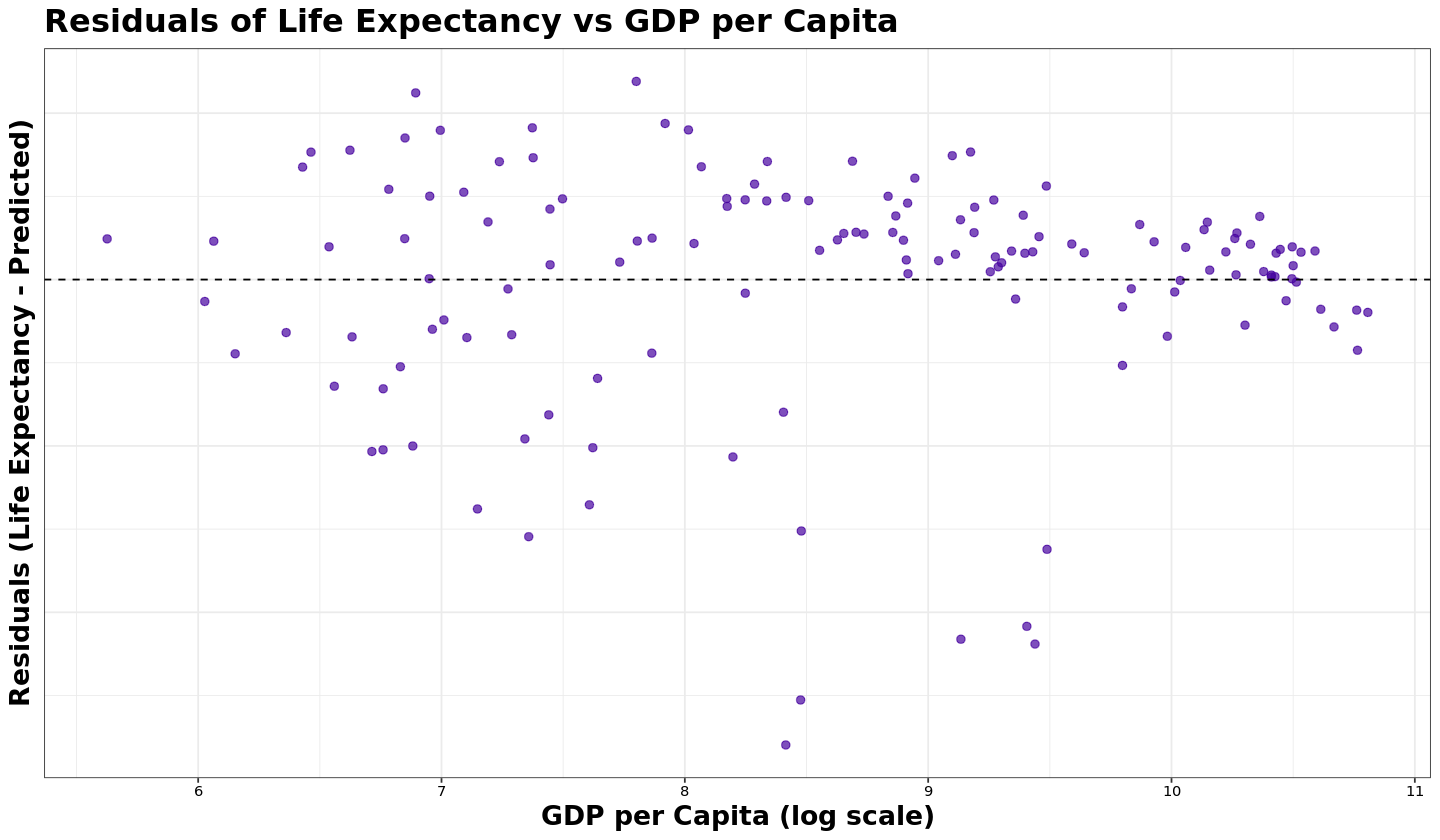

In [21]:
loess_model <- loess(lifeExp ~ log_gdpPercap, data = subset_df)

# Compute residuals
subset_df$residuals <- subset_df$lifeExp - predict(loess_model)

# Plot residuals vs GDP per capita
ggplot(data = subset_df, aes(x = log_gdpPercap, y = residuals)) +
    geom_point(size = 2, alpha = 0.7, color = color1) + 
    geom_hline(yintercept = 0, linetype = "dashed", color = "black") + 
    theme_bw() +
    ThemeMain + 
    labs(title = "Residuals of Life Expectancy vs GDP per Capita",
         x = "GDP per Capita (log scale)",
         y = "Residuals (Life Expectancy - Predicted)")

`geom_smooth()` using formula = 'y ~ x'


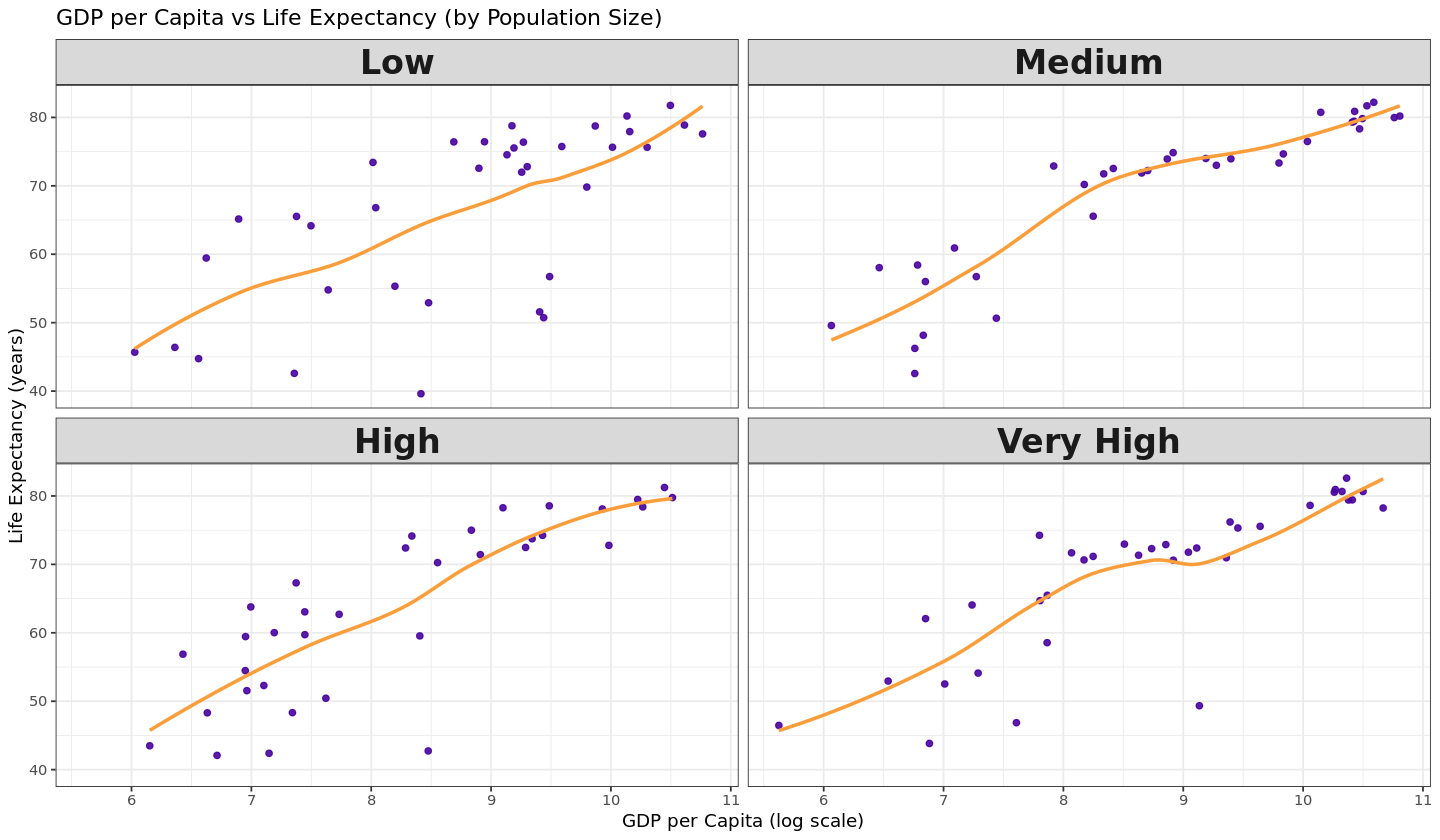

In [22]:
subset_df <- subset_df %>%
    mutate(pop_category = cut(pop, 
                              breaks = quantile(pop, probs = seq(0, 1, by = 0.25), na.rm = TRUE), 
                              include.lowest = TRUE, 
                              labels = c("Low", "Medium", "High", "Very High")))
                              
ggplot(data = subset_df, aes(x = log_gdpPercap, y = lifeExp)) +
    geom_point(alpha = 0.9, color = color1) +
    geom_smooth(method = "loess", color = color2, se = FALSE) +
    facet_wrap(~pop_category) +  
    theme_bw() + 
    theme(strip.text = element_text(size = 20, face = "bold")) +
    # ThemeMain + 
    labs(
        title = "GDP per Capita vs Life Expectancy (by Population Size)",
        x = "GDP per Capita (log scale)",
        y = "Life Expectancy (years)"
    )

In [23]:
subset_df <- subset_df %>% filter(continent != "Oceania")

ggplot(data = subset_df, aes(x = log_gdpPercap, y = lifeExp)) +
    geom_point(alpha = 0.7, color=color1) +
    geom_smooth(method = "loess", se=FALSE, color=color2) + 
    facet_wrap(~continent) +
    theme_bw() +
    theme(strip.text = element_text(size = 20, face = "bold")) +
    labs(x = "Log of GDP per Capita", y = "Life Expectancy", title = "Life Expectancy vs GDP Per Capita")

`geom_smooth()` using formula = 'y ~ x'


In [24]:
ggplot(data =  gapminder, aes(x = log_gdpPercap, y = lifeExp)) +
    geom_point(size= 2, alpha=.9, color=color1)  +
    geom_smooth(method = loess, color=color2, se=FALSE) +
    theme_bw() + 
    ThemeMain + 
    labs(title = "GDP per Capita vs Life Expectancy all Years",
       x = "GDP per Capita (log scale)",
       y = "Life Expectancy (years)")

`geom_smooth()` using formula = 'y ~ x'


### Second Set of Questions

`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


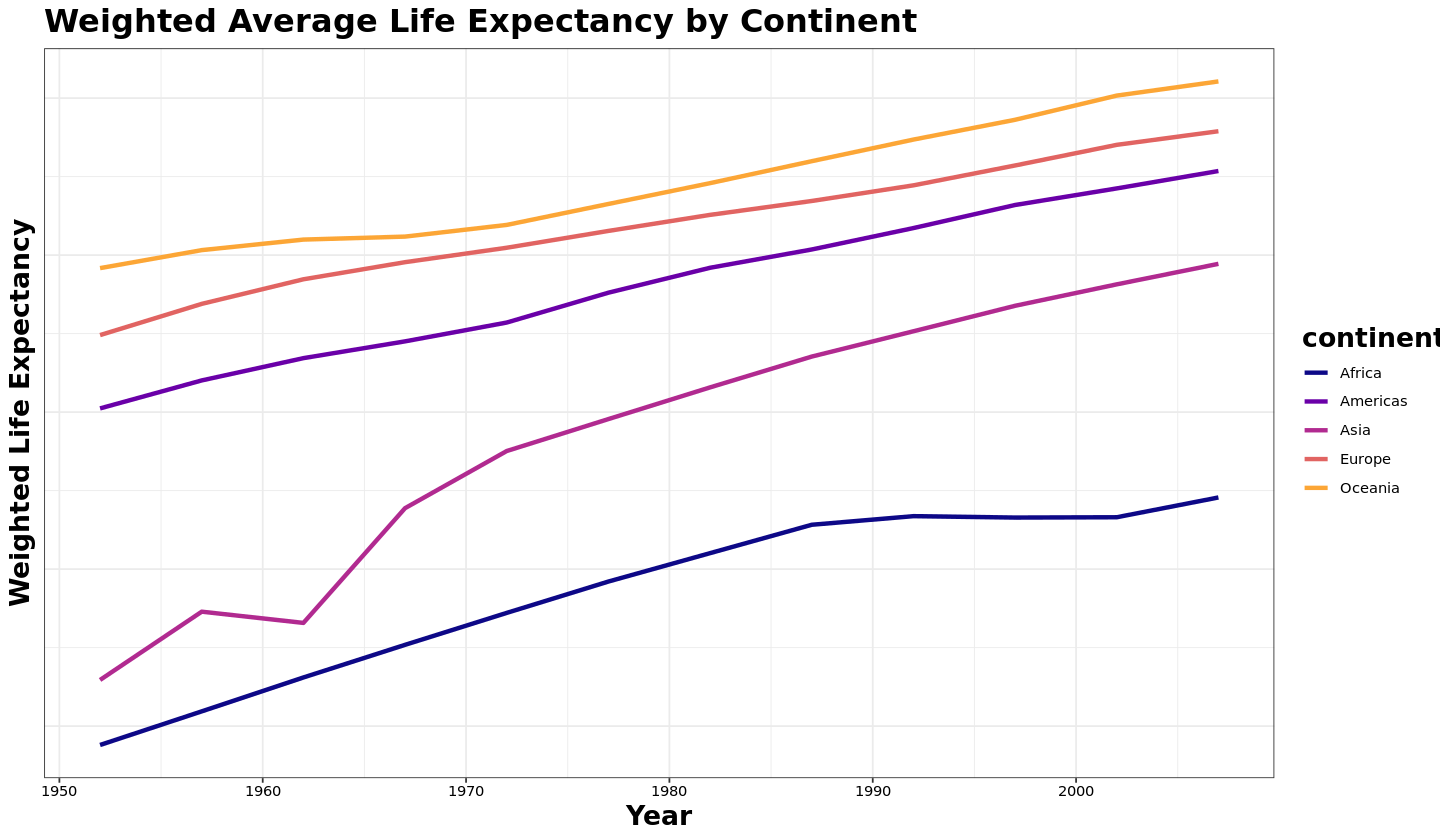

In [25]:


weighted_average <- gapminder %>%
  group_by(continent, year) %>%
  summarise(weighted_lifeExp = weighted.mean(lifeExp, w = pop, na.rm = TRUE))

ggplot(data = weighted_average, aes(x = year, y=weighted_lifeExp, color=continent)) +
    scale_color_manual(values = continent_col ) + 
    geom_line(lwd=1.25) +
    theme_bw() +
    ThemeMain +
    labs(
        title = "Weighted Average Life Expectancy by Continent",
        x = "Year",
        y = "Weighted Life Expectancy"
    )

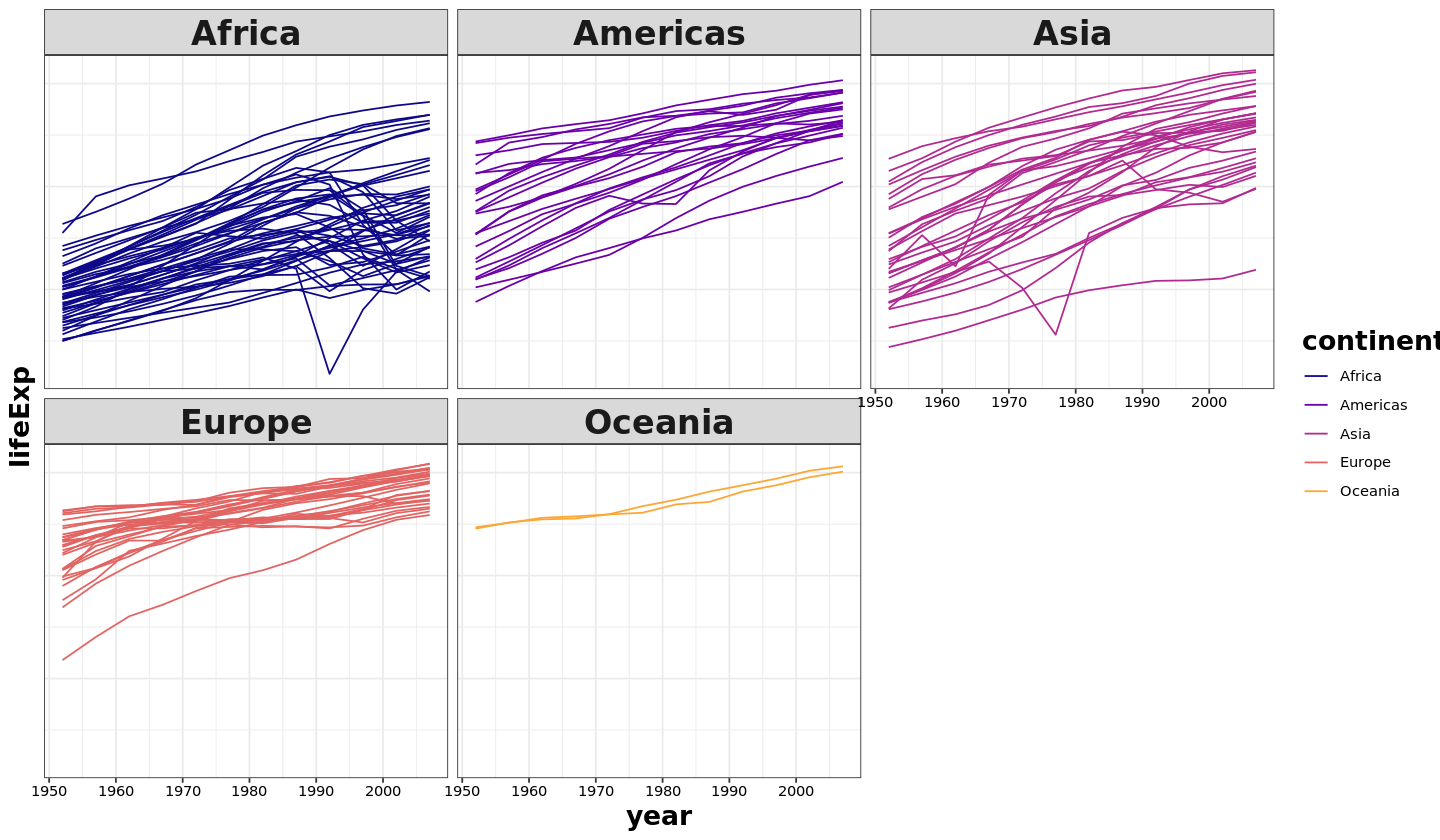

In [26]:

ggplot(data = gapminder, aes(x = year, y=lifeExp, color=continent, group=country)) +
    geom_line() +
    facet_wrap(~continent) + 
    scale_color_manual(values = continent_col ) + 
    theme_bw() +
    theme(strip.text = element_text(size = 20, face = "bold")) +
    ThemeMain

In [27]:
Africa_df <- subset(gapminder, country %in% c("Algeria", "Morocco", "Rwanda", "Zimbabwe"))

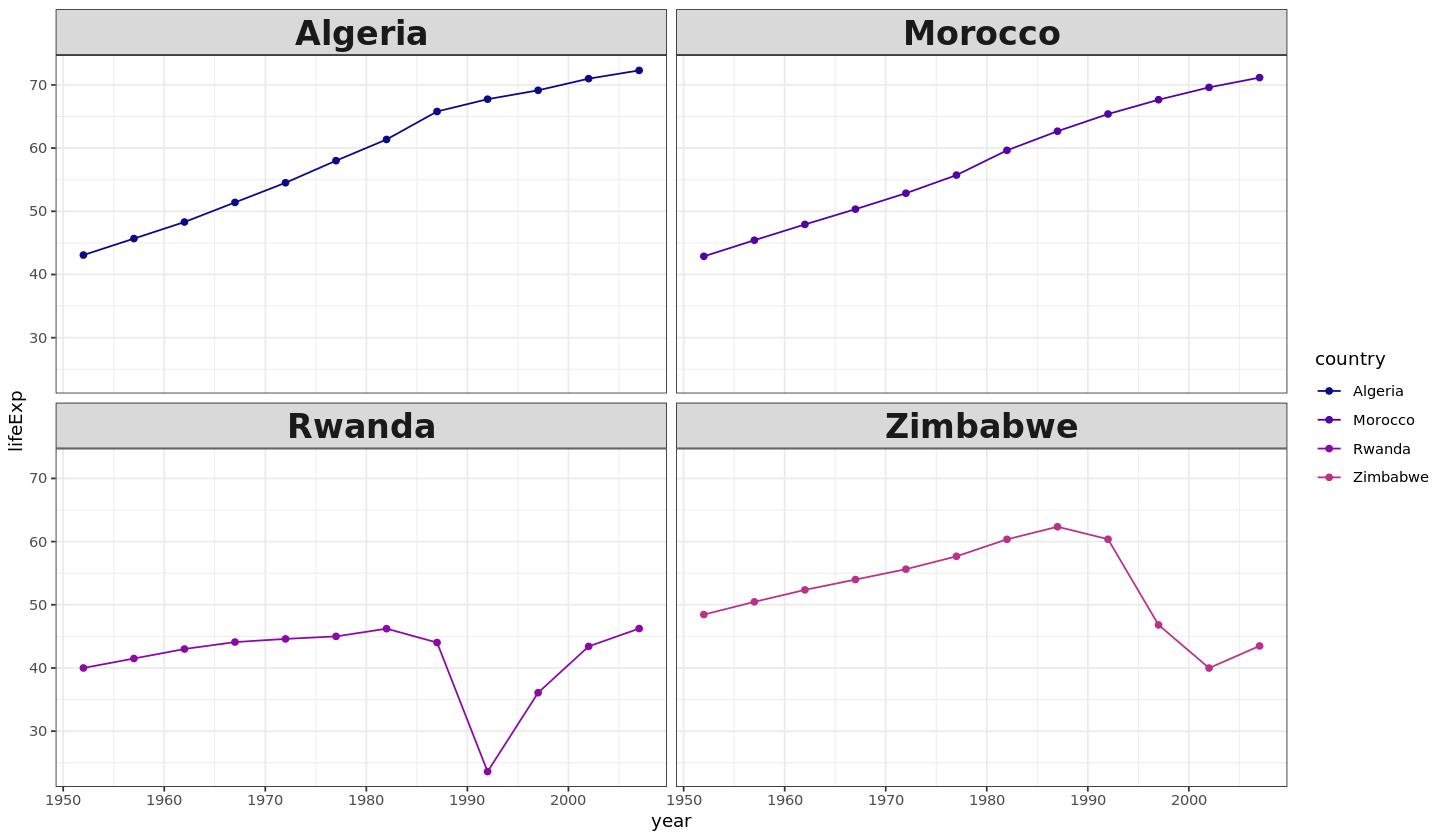

In [28]:
ggplot(data = Africa_df, aes(x = year, y=lifeExp, color=country)) +
    geom_point() +
    geom_line() +
    facet_wrap(~country) +
    scale_color_manual(values = viridis::plasma(8)[1:7] ) + 
    theme_bw() +
    theme(strip.text = element_text(size = 20, face = "bold"))

### Third Set of Questions

`geom_smooth()` using formula = 'y ~ x'


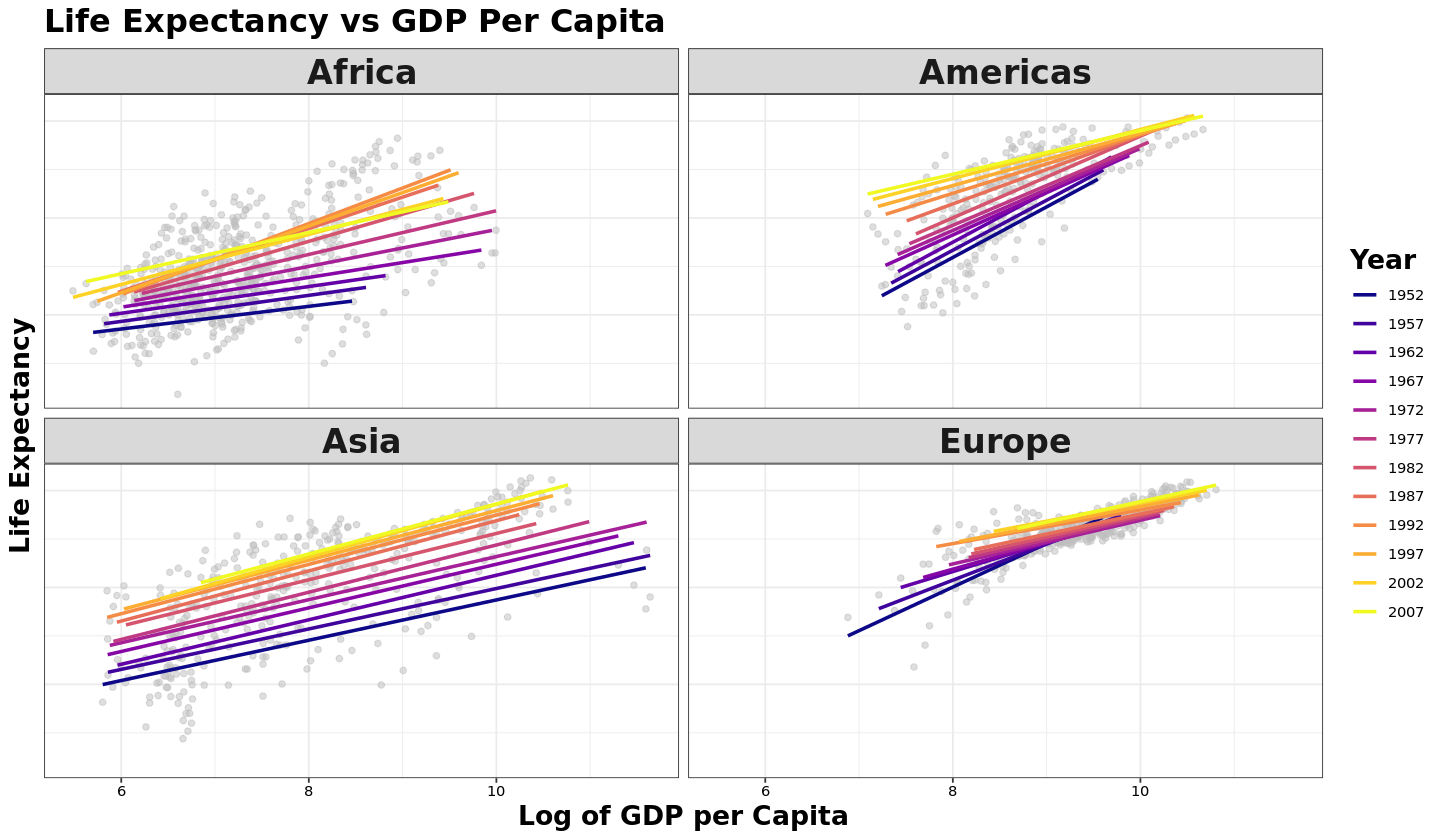

In [29]:
gapminder_filtered <- gapminder %>% filter(continent != "Oceania")

ggplot(data = gapminder_filtered, aes(x = log_gdpPercap, y = lifeExp)) +
    geom_point(color = 'grey', alpha = 0.5) +  
    geom_smooth(aes(color = factor(year)), method = "lm", se = FALSE) + 
    scale_color_manual(values = viridis::plasma(12)) + 
    facet_wrap(~continent) +
    labs(x = "Log of GDP per Capita", 
         y = "Life Expectancy", 
         title = "Life Expectancy vs GDP Per Capita",
         color = "Year") + 
    theme_bw() +
    theme(strip.text = element_text(size = 20, face = "bold")) +
    ThemeMain

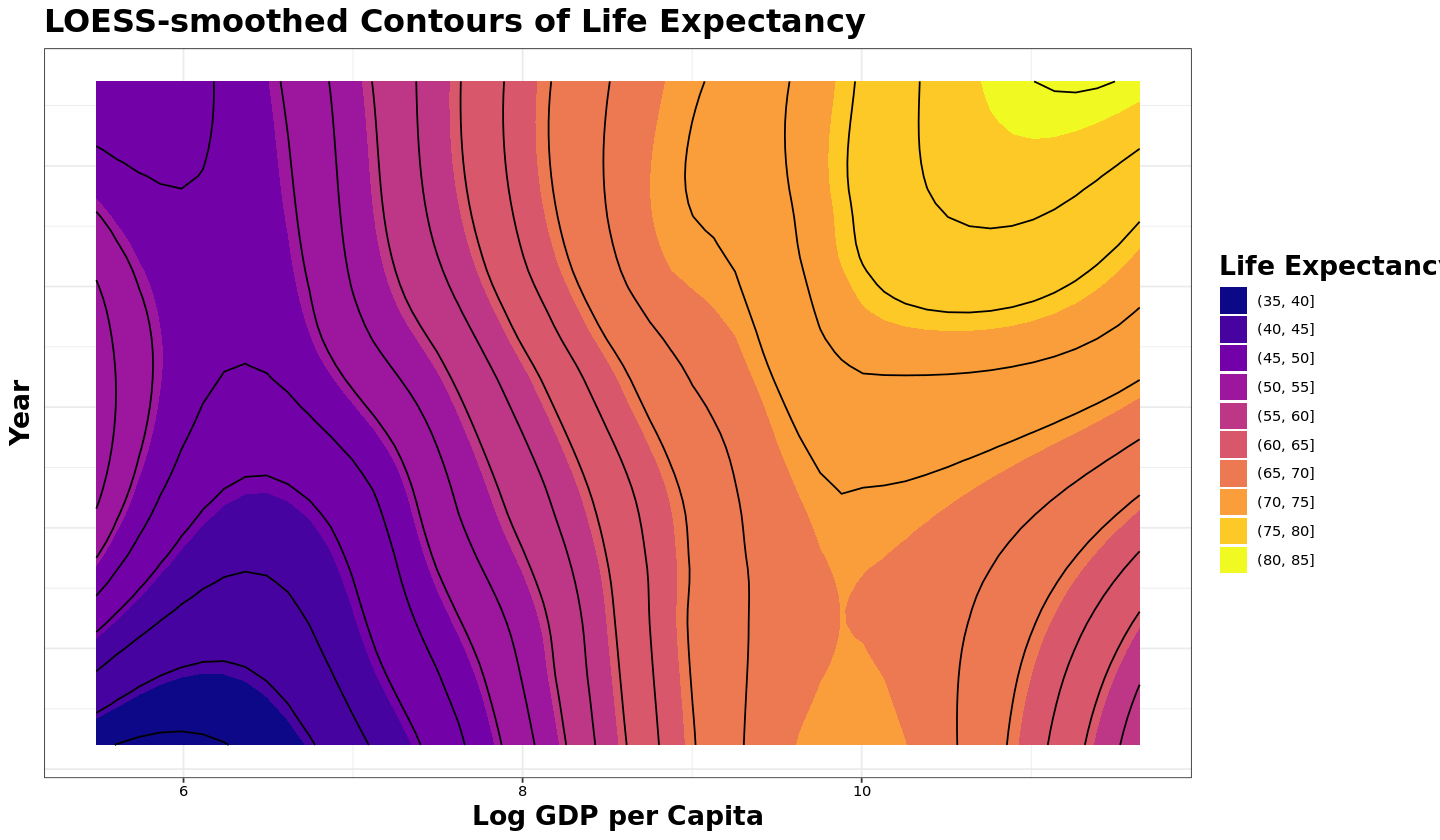

In [30]:


# Create a grid for predictions
grid <- expand.grid(
    log_gdpPercap = seq(min(gapminder$log_gdpPercap), max(gapminder$log_gdpPercap), length.out = 50),
    year = seq(min(gapminder$year), max(gapminder$year), length.out = 50)
)

# Fit a bivariate LOESS model
loess_model <- loess(lifeExp ~ log_gdpPercap * year, data = gapminder, span = 0.25,)
grid$lifeExp <- as.vector(predict(loess_model, newdata = grid))

# Plot contour lines
ggplot(grid, aes(x = log_gdpPercap, y = year, z = lifeExp)) +
    geom_contour_filled() +  # Filled contour plot
    geom_contour(bins = 20, color = "black") +
    scale_fill_viridis_d(option="plasma") + # Better color scale
    labs(x = "Log GDP per Capita", 
         y = "Year", 
         fill = "Life Expectancy",
         title = "LOESS-smoothed Contours of Life Expectancy") +
    theme_bw() +
    ThemeMain

In [31]:

model <- lm(lifeExp ~ log(gdpPercap) + poly(year, 2), data = gapminder)

x_seq <- seq(min(log(gapminder$gdpPercap)), max(log(gapminder$gdpPercap)), length.out = 30)
y_seq <- seq(min(gapminder$year), max(gapminder$year), length.out = 30)

x_grid <- rep(x_seq, each = length(y_seq))  
y_grid <- rep(y_seq, times = length(x_seq))  
z_grid <- predict(model, newdata = data.frame(gdpPercap = exp(x_grid), year = y_grid))

# Reshape into matrices
x_matrix <- matrix(x_grid, nrow = length(x_seq), ncol = length(y_seq), byrow = TRUE)
y_matrix <- matrix(y_grid, nrow = length(x_seq), ncol = length(y_seq), byrow = TRUE)
z_matrix <- matrix(z_grid, nrow = length(x_seq), ncol = length(y_seq), byrow = TRUE)

viridis_colors <- viridis(30, option = "B")
viridis_scale <- lapply(seq(0, 1, length.out = 30), function(i) {
  list(i, viridis_colors[i * 29 + 1]) 
})

# 3D scatter plot of data points
p <- plot_ly(
  data = gapminder,
  x = ~log(gdpPercap),  
  y = ~year,            
  z = ~lifeExp,         
  type = "scatter3d",
  mode = "markers",
  marker = list(size = 4, opacity = 0.3, color="Grey")
  # color = "A9A9A9"
) 

# Add fitted regression plane
p <- p %>% add_surface(
  x = x_matrix, 
  y = y_matrix, 
  z = z_matrix, 
  colorscale = viridis_scale,
  # colorscale = "Plasma",
  opacity = 0.6
)


p <- p %>% layout(
  width=550, 
  title = "Interaction Plot with Fitted Plane",
  scene = list(
    xaxis = list(title = "Log of GDP per Capita"),
    yaxis = list(title = "Year"),
    zaxis = list(title = "Life Expectancy") 
  ) 
)

p


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“'surface' objects don't have these attributes: 'mode', 'marker'
Valid attributes include:
'_deprecated', 'autocolorscale', 'cauto', 'cmax', 'cmid', 'cmin', 'coloraxis', 'colorbar', 'colorscale', 'connectgaps', 'contours', 'customdata', 'customdatasrc', 'hidesurface', 'hoverinfo', 'hoverinfosrc', 'hoverlabel', 'hovertemplate', 'hovertemplatesrc', 'hovertext', 'hovertextsrc', 'ids', 'idssrc', 'legendgroup', 'legendgrouptitle', 'legendrank', 'lighting', 'lightposition', 'meta', 'metasrc', 'name', 'opacity', 'opacityscale', 'reversescale', 'scene', 'showlegend', 'showscale', 'stream', 'surfacecolor', 'surfacecolorsrc', 'text', 'textsrc', 'type', 'uid', 'uirevision', 'visible', 'x', 'xcalendar', 'xhoverformat', 'xsrc', 'y', 'ycalendar', 'yhoverformat', 'ysrc', 'z', 'zcalendar', 'zhoverformat', 'zsrc', 'key', 'set', 'frame', 'transforms', '_isNestedKey', '_isS

HTML widgets cannot be represented in plain text (need html)